In [158]:
import networkx as nx
import numpy as np
import sys
import seaborn as sns
import pickle
import pandas as pd
sys.path.append('..')

In [7]:
from functions import *

In [8]:
sns.set_theme(palette="colorblind",style="ticks",context='notebook')

cm=1/2.54
params = {
    'legend.fontsize': 12,
    'font.size': 12,
    'figure.figsize': (5.0*cm,5.0*cm), # figsize for A4 latex doc
    'axes.labelsize': 12,
    'axes.titlesize': 12,
    'xtick.labelsize': 12,
    'ytick.labelsize': 12,
    'lines.markersize': 3.0,
    'lines.linewidth': 1.5,
    }

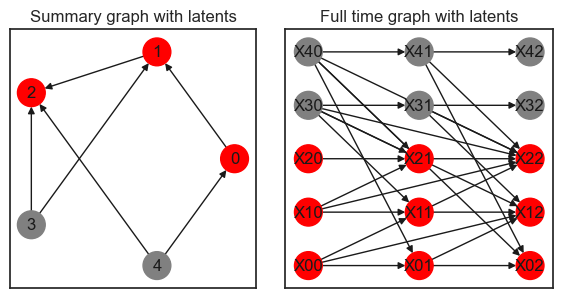

In [21]:
seed=1
p = 0.4 # prob. of edge in summary graph
n_timelags = 2
refractory_effect = n_timelags
n_obs = 3
n_hidden = 2
n_neurons = n_obs+n_hidden
observed_nodes = np.arange(n_obs)
latent_nodes = np.arange(n_obs, n_obs+n_hidden)

observed_graph = nx.erdos_renyi_graph(n=n_obs, p=p, directed=True,seed=seed)
summary_graph = nx.DiGraph()
summary_graph.add_nodes_from(observed_nodes)
summary_graph.add_nodes_from(latent_nodes)
summary_graph.add_edges_from(observed_graph.edges())
for L in latent_nodes:
    s = np.random.choice([2])
    targets = np.random.choice(observed_nodes, size=s, replace=False)
    summary_graph.add_edges_from([(L,i) for i in targets])

fulltime_graph, pos, time_label = create_fulltime_graph(summary_graph, n_timelags=n_timelags)
node_color = ['grey' if node in latent_nodes else 'red' for node in summary_graph.nodes()]
# get the observed nodes in fulltime graph
observed_nodes_fulltime = []
for node in observed_nodes:
    for idx in time_label:
        if time_label[idx].find(f'X{node}') != -1:
            observed_nodes_fulltime.append(idx)
summary_observed = nx.subgraph(summary_graph, observed_nodes)
fulltime_graph_obs = nx.subgraph(fulltime_graph, observed_nodes_fulltime)
fulltime_node_color = ['grey' if node not in observed_nodes_fulltime else 'red' for node in fulltime_graph.nodes()]

# visualisation of one of the networks generated
fig, ax = plt.subplots(1, 2, figsize=(15*cm,8*cm))
nx.draw_networkx(summary_graph, arrows=True, 
                 ax=ax[0], with_labels=True, 
                 node_size=400, alpha=1, node_color=node_color,
                pos=nx.circular_layout(summary_graph))
ax[0].set_title("Summary graph with latents")
ax[0].set_aspect('equal', adjustable='box')
nx.draw_networkx(fulltime_graph, pos=pos, labels=time_label, node_size=400, ax=ax[1], node_color=fulltime_node_color,alpha=1)
ax[1].set_title("Full time graph with latents")
plt.tight_layout()
plt.show()

In [23]:
summary_graph.edges()

OutEdgeView([(0, 1), (1, 2), (3, 2), (3, 1), (4, 0), (4, 2)])

In [24]:
tmp = summary_graph.copy()
tmp.remove_edge(0,1)
get_mag_from_dag(tmp,observed_nodes=np.arange(3))

{(0, 2): '<->', (2, 0): '<->', (1, 2): '-->'}

In [3]:
arr = np.array([[0,1,2],[3,4,5]])

In [9]:
np.where(np.logical_or(arr > 10,arr>100) )[0]

array([], dtype=int64)

In [18]:
ls = [1,2,3]

In [21]:
ls.pop(0)
ls

[]

In [38]:
ind=np.column_stack(np.array([[0,1,2],[3,4,5]]))

In [41]:
ind=ind[1:]
len(ind)

0

In [42]:
vertices_with_undecided_marks=[0, 1, 2, 3, 4, 5]
entropy=[0.44217935649972373, 0.44217935649972373, 0.46438561897747244, 0.44217935649972373, 0.46438561897747244, 0]


In [72]:
n_timelags=2
neurons=np.arange(3)
entropy_by_neuron = np.zeros(3)

for i in range(len(vertices_with_undecided_marks)):
    H_value = entropy[i]
    node_idx = vertices_with_undecided_marks[i]
    print(node_idx// (n_timelags+1),node_idx, H_value)
    entropy_by_neuron[node_idx// (n_timelags+1)] += H_value

0 0 0.44217935649972373
0 1 0.44217935649972373
0 2 0.46438561897747244
1 3 0.44217935649972373
1 4 0.46438561897747244
1 5 0


In [73]:
entropy_by_neuron

array([1.34874433, 0.90656498, 0.        ])

In [76]:
d={key:0 for key in [1,2]}

In [77]:
d[1]+=1

In [78]:
d

{1: 1, 2: 0}

In [79]:
max(d, key=d.get)


1

In [ ]:
from functions import get_pag_arrows

In [85]:
pag = np.array(
[[0., 2., 2., 0., 0., 0., 0., 2., 2.],
 [3., 0., 2., 0., 2., 2., 1., 0., 2.],
 [3., 3., 0., 0., 2., 2., 3., 3., 0.],
 [0., 0., 0., 0., 2., 2., 0., 2., 2.],
 [0., 2., 2., 3., 0., 2., 0., 0., 2.],
 [0., 2., 2., 3., 3., 0., 0., 0., 0.],
 [0., 2., 2., 0., 0., 0., 0., 2., 2.],
 [1., 0., 2., 1., 0., 0., 3., 0., 2.],
 [3., 3., 0., 3., 3., 0., 3., 3., 0.]]
)

In [114]:
n_timelags=2
n_neurons=3
p = pag.shape[0]

In [129]:
p = pag.shape[0]
for i in range(p):
    for j in range(p):
        t_diff = i % (n_timelags + 1) - j % (n_timelags + 1)
        if t_diff == 1 and i // (n_timelags+1) != j // (n_timelags+1) and pag[i,j] == 3 and pag[j,i] == 2:
            #print(j,'->',i)
            if pag[i-1, j-1] == 1 and pag[j-1, i-1] == 2:
                pag[i-1, j-1] = 3

In [96]:
pag[8,1] == 3 and pag[1,8] == 2 and pag[7,0] == 1 and pag[0,7] == 2

True

In [113]:
print(8 % (n_timelags+1), 1 % (n_timelags+1), 8 // (n_timelags+1), 1 // (n_timelags+1))

2 1 2 0


In [130]:
get_pag_arrows(pag)

0 --> 1
0 --> 2
0 --> 7
0 --> 8
1 --> 2
1 <-> 4
1 <-> 5
1 --> 8
2 <-> 4
2 <-> 5
3 --> 4
3 --> 5
3 --> 7
3 --> 8
4 <-> 1
4 <-> 2
4 --> 5
4 --> 8
5 <-> 1
5 <-> 2
6 --> 1
6 --> 2
6 --> 7
6 --> 8
7 --> 2
7 --> 8


In [105]:
has_circle = np.where(pag==1)[1]

In [106]:
has_circle

array([6, 0, 3])

In [109]:
np.where(pag[has_circle[0],:] == 2)[0]

array([1, 2, 7, 8])

In [145]:
np.random.choice(10)

2

In [146]:
8//3

2

# Res active learn

In [307]:
with open('../data/res_4+2nodes_2tl_p0.1_activelearning.pickle', 'rb') as f:
    res = pickle.load(f)

In [308]:
df = pd.DataFrame(res)
df

,random,entropy-byneuron
0,0,0
1,1,1
2,1,1
3,1,1
4,1,1
...,...,...
95,1,1
96,1,1
97,3,2
98,0,0


In [309]:
print(df)
print('Mean:\n',df.mean(),'\nSt. dev:\n', df.std())

    random  entropy-byneuron
0        0                 0
1        1                 1
2        1                 1
3        1                 1
4        1                 1
..     ...               ...
95       1                 1
96       1                 1
97       3                 2
98       0                 0
99       0                 0

[100 rows x 2 columns]
Mean:
 random              0.74
entropy-byneuron    0.72
dtype: float64 
St. dev:
 random              0.773553
entropy-byneuron    0.739642
dtype: float64


In [310]:
df.loc[df['random'] != df['entropy-byneuron'] ]

,random,entropy-byneuron
22,2,1
97,3,2


In [220]:
ls=[0]

In [221]:
ls[-1]

0